In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(tidyr)))
source("../../figures/utils/figure_themes.r")

width <- 8
height <- 6
options(repr.plot.width=width, repr.plot.height=height)

In [2]:
# set path to the data morphology
# class
df_morphology_class_path <- file.path("..","data","processed","aggregate_mAPs","morphology","mAP_scores_class.csv")
reg_df_morphology_class_path <- file.path("..","data","processed","mAP_scores","morphology","mAP_scores_regular_class.csv")
shuffled_morphology_class_path <- file.path("..","data","processed","mAP_scores","morphology","mAP_scores_shuffled_feature_space_class.csv")
# treatment 
treatment_df_morphology_treatment_path <- file.path("..","data","processed","aggregate_mAPs","morphology","mAP_scores_treatment.csv")
reg_df_morphology_treatment_path <- file.path("..","data","processed","mAP_scores","morphology","mAP_scores_regular_treatment.csv")
shuffled_morphology_treatment_path <- file.path("..","data","processed","mAP_scores","morphology","mAP_scores_shuffled_feature_space_treatment.csv")

# set path to the secretome data
# class
df_secretome_class_path <- file.path("..","data","processed","aggregate_mAPs","secretome","mAP_scores_class.csv")
reg_df_secretome_class_path <- file.path("..","data","processed","mAP_scores","secretome","mAP_scores_regular_class.csv")
shuffled_secretome_class_path <- file.path("..","data","processed","mAP_scores","secretome","mAP_scores_shuffled_feature_space_class.csv")
# treatment
treatment_df_secretome_treatment_path <- file.path("..","data","processed","aggregate_mAPs","secretome","mAP_scores_treatment.csv")
reg_df_secretome_treatment_path <- file.path("..","data","processed","mAP_scores","secretome","mAP_scores_regular_treatment.csv")
shuffled_secretome_treatment_path <- file.path("..","data","processed","mAP_scores","secretome","mAP_scores_shuffled_feature_space_treatment.csv")

# read in the data
df_morphology_class <- read.csv(df_morphology_class_path)
reg_df_morphology_class <- read.csv(reg_df_morphology_class_path)
shuffled_morphology_class <- read.csv(shuffled_morphology_class_path)

df_morphology_treatment <- read.csv(treatment_df_morphology_treatment_path)
reg_df_morphology_treatment <- read.csv(reg_df_morphology_treatment_path)
shuffled_morphology_treatment <- read.csv(shuffled_morphology_treatment_path)

df_secretome_class <- read.csv(df_secretome_class_path)
reg_df_secretome_class <- read.csv(reg_df_secretome_class_path)
shuffled_secretome_class <- read.csv(shuffled_secretome_class_path)

df_secretome_treatment <- read.csv(treatment_df_secretome_treatment_path)
reg_df_secretome_treatment <- read.csv(reg_df_secretome_treatment_path)
shuffled_secretome_treatment <- read.csv(shuffled_secretome_treatment_path)

In [3]:
unique(df_morphology_class$shuffled)
unique(df_morphology_treatment$shuffled)
unique(df_secretome_class$shuffled)
unique(df_secretome_treatment$shuffled)

[1] "non-shuffled" "shuffled"

[1] "non-shuffled" "shuffled"

[1] "non-shuffled" "shuffled"

[1] "non-shuffled" "shuffled"

In [4]:
levels_list <- c(
    'Media',
    'DMSO_0.100_%_DMSO_0.025_%',
    'DMSO_0.100_%_DMSO_1.000_%',
    'DMSO_0.100_%_Z-VAD-FMK_30.000_uM',
    'DMSO_0.100_%_Z-VAD-FMK_100.000_uM',

    'Disulfiram_0.100_uM_DMSO_0.025_%',
    'Disulfiram_1.000_uM_DMSO_0.025_%',
    'Disulfiram_2.500_uM_DMSO_0.025_%',
    
    'Flagellin_0.100_ug_per_ml_DMSO_0.025_%',
    'Flagellin_1.000_ug_per_ml_DMSO_0.025_%',
    'Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM',
    
    'LPS_0.010_ug_per_ml_DMSO_0.025_%',
    'LPS_0.100_ug_per_ml_DMSO_0.025_%',
    'LPS_1.000_ug_per_ml_DMSO_0.025_%',

    'LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM',
    'LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM',

    'LPS_10.000_ug_per_ml_DMSO_0.025_%',
    'LPS_10.000_ug_per_ml_Disulfiram_0.100_uM',
    'LPS_10.000_ug_per_ml_Disulfiram_1.000_uM',
    'LPS_10.000_ug_per_ml_Disulfiram_2.500_uM',
    'LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM',
    
    'LPS_100.000_ug_per_ml_DMSO_0.025_%',
    'LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%',

    'H2O2_100.000_nM_DMSO_0.025_%',
    'H2O2_100.000_uM_DMSO_0.025_%',
    'H2O2_100.000_uM_Disulfiram_1.000_uM',
    'H2O2_100.000_uM_Z-VAD-FMK_100.000_uM',
    'Thapsigargin_1.000_uM_DMSO_0.025_%',
    'Thapsigargin_10.000_uM_DMSO_0.025_%',

    'Topotecan_5.000_nM_DMSO_0.025_%',  
    'Topotecan_10.000_nM_DMSO_0.025_%',
    'Topotecan_20.000_nM_DMSO_0.025_%'
)

## Clean the class data

In [5]:
# declare the shuffled column as a factor
# replace the values in the shuffled column
# declare the shuffled column as a factor
# replace the values in the shuffled column
df_morphology_class$shuffled <- gsub("shuffled", "Shuffled", df_morphology_class$shuffled)
df_morphology_class$shuffled <- gsub("non-Shuffled", "Non-shuffled", df_morphology_class$shuffled)
df_morphology_class$shuffled <- factor(df_morphology_class$shuffled, levels = c( "Non-shuffled", "Shuffled"))
df_morphology_class$Metadata_labels <- factor(df_morphology_class$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))

df_secretome_class$shuffled <- gsub("shuffled", "Shuffled", df_secretome_class$shuffled)
df_secretome_class$shuffled <- gsub("non-Shuffled", "Non-shuffled", df_secretome_class$shuffled)
df_secretome_class$shuffled <- factor(df_secretome_class$shuffled, levels = c( "Non-shuffled", "Shuffled"))
df_secretome_class$Metadata_labels <- factor(df_secretome_class$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))

df_morphology_treatment$shuffled <- gsub("shuffled", "Shuffled", df_morphology_treatment$shuffled)
df_morphology_treatment$shuffled <- gsub("non-Shuffled", "Non-shuffled", df_morphology_treatment$shuffled)
df_morphology_treatment$shuffled <- factor(df_morphology_treatment$shuffled, levels = c( "Non-shuffled", "Shuffled"))
df_morphology_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- factor(df_morphology_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose, levels = levels_list)

df_secretome_treatment$shuffled <- gsub("shuffled", "Shuffled", df_secretome_treatment$shuffled)
df_secretome_treatment$shuffled <- gsub("non-Shuffled", "Non-shuffled", df_secretome_treatment$shuffled)
df_secretome_treatment$shuffled <- factor(df_secretome_treatment$shuffled, levels = c("Non-shuffled", "Shuffled"))
df_secretome_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- factor(df_secretome_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose, levels = levels_list)


In [6]:
unique(df_morphology_class$shuffled)
unique(df_morphology_treatment$shuffled)
unique(df_secretome_class$shuffled)
unique(df_secretome_treatment$shuffled)

[1] Non-shuffled Shuffled    
Levels: Non-shuffled Shuffled

[1] Non-shuffled Shuffled    
Levels: Non-shuffled Shuffled

[1] Non-shuffled Shuffled    
Levels: Non-shuffled Shuffled

[1] Non-shuffled Shuffled    
Levels: Non-shuffled Shuffled

In [7]:
width <- 10
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# define the barplot function
barplot_function <- function(df, x,title, y_label, x_label, legend_title){
    x <- sym(x)
    barplot <- (
        ggplot(df, aes(x=!!x, y=mean_average_precision, fill=shuffled))
        + geom_bar(stat="identity", position="dodge")
        + labs(x=x_label, y=y_label)
        # legend title
        + scale_fill_discrete(name=legend_title)
        + theme_bw()
        + ylim(0,1)
        + ggtitle(title)
        + figure_theme
    )
    return(barplot)
}

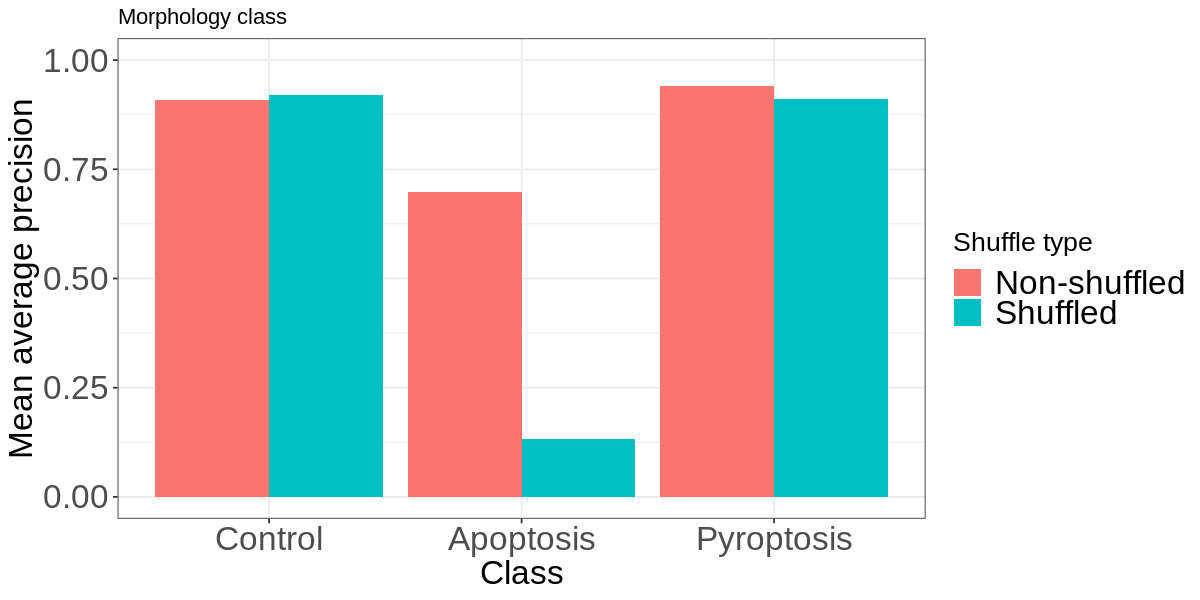

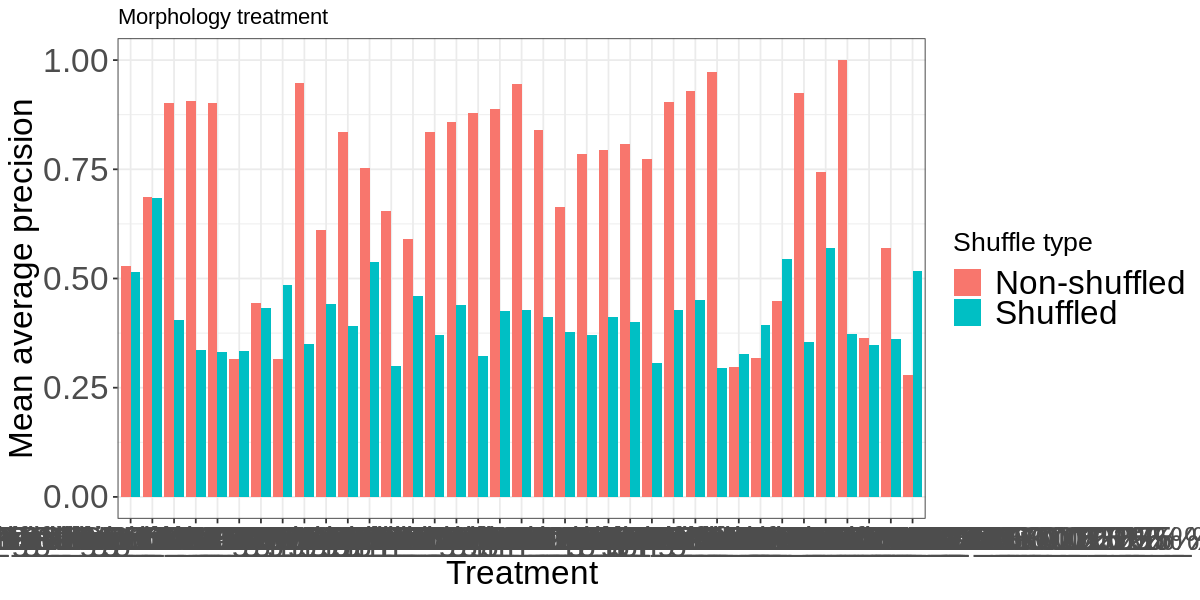

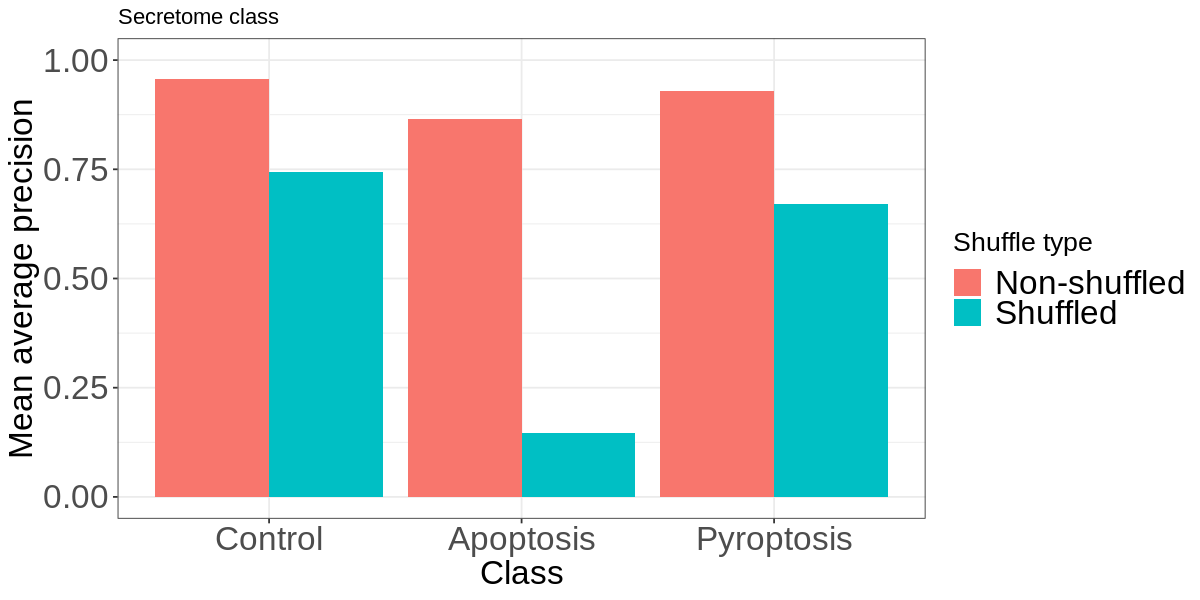

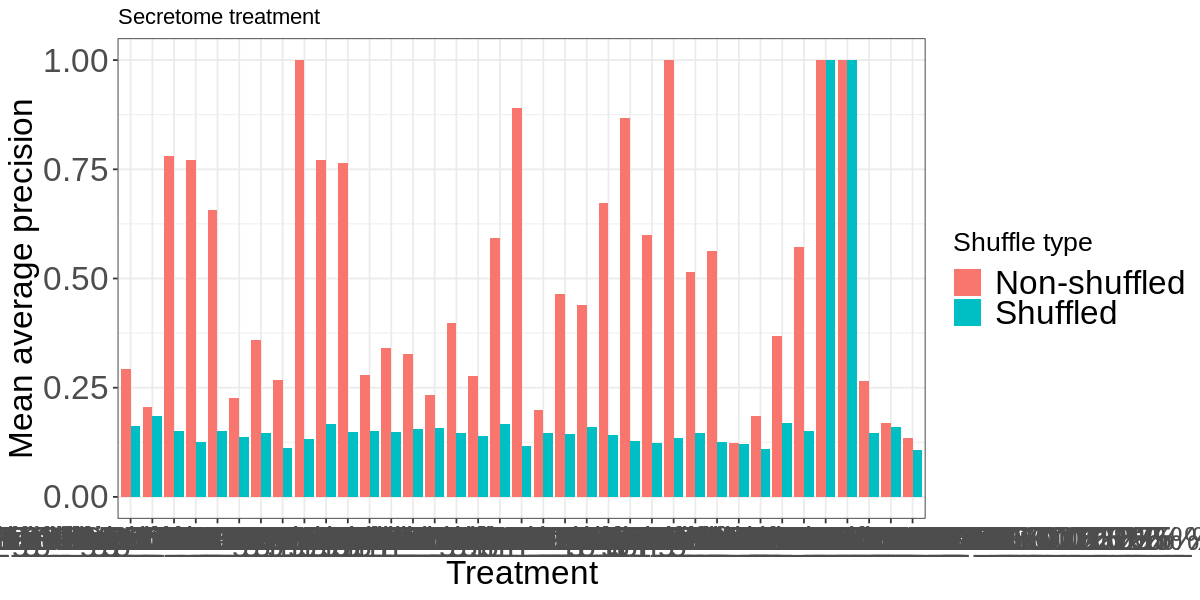

In [8]:
barplot_morphology_class <- barplot_function(df_morphology_class, "Metadata_labels","Morphology class", "Mean average precision", "Class", "Shuffle type")
barplot_morphology_treatment <- barplot_function(df_morphology_treatment, "oneb_Metadata_Treatment_Dose_Inhibitor_Dose","Morphology treatment", "Mean average precision", "Treatment", "Shuffle type")
barplot_secretome_class <- barplot_function(df_secretome_class, "Metadata_labels","Secretome class", "Mean average precision", "Class", "Shuffle type")
barplot_secretome_treatment <- barplot_function(df_secretome_treatment, "oneb_Metadata_Treatment_Dose_Inhibitor_Dose","Secretome treatment", "Mean average precision", "Treatment", "Shuffle type")

barplot_morphology_class
barplot_morphology_treatment
barplot_secretome_class
barplot_secretome_treatment


## Clean the single well data

In [9]:
# combine the dataframes
all_df_morphology_class <- rbind(reg_df_morphology_class, shuffled_morphology_class)
all_df_morphology_treatment <- rbind(reg_df_morphology_treatment, shuffled_morphology_treatment)
all_df_secretome_class <- rbind(reg_df_secretome_class, shuffled_secretome_class)
all_df_secretome_treatment <- rbind(reg_df_secretome_treatment, shuffled_secretome_treatment)

all_df_morphology_class$shuffled <- gsub("shuffled", "Shuffled", all_df_morphology_class$shuffled)
all_df_morphology_class$shuffled <- gsub("non-Shuffled", "Non-shuffled", all_df_morphology_class$shuffled)
all_df_morphology_class$shuffled <- factor(all_df_morphology_class$shuffled, levels = c( "Non-shuffled", "Shuffled"))
all_df_morphology_class$Metadata_labels <- factor(all_df_morphology_class$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))

all_df_secretome_class$shuffled <- gsub("shuffled", "Shuffled", all_df_secretome_class$shuffled)
all_df_secretome_class$shuffled <- gsub("non-Shuffled", "Non-shuffled", all_df_secretome_class$shuffled)
all_df_secretome_class$shuffled <- factor(all_df_secretome_class$shuffled, levels = c( "Non-shuffled", "Shuffled"))

all_df_morphology_treatment$shuffled <- gsub("shuffled", "Shuffled", all_df_morphology_treatment$shuffled)
all_df_morphology_treatment$shuffled <- gsub("non-Shuffled", "Non-shuffled", all_df_morphology_treatment$shuffled)
all_df_morphology_treatment$shuffled <- factor(all_df_morphology_treatment$shuffled, levels = c( "Non-shuffled", "Shuffled"))
all_df_morphology_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- factor(all_df_morphology_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose, levels = levels_list)

all_df_secretome_treatment$shuffled <- gsub("shuffled", "Shuffled", all_df_secretome_treatment$shuffled)
all_df_secretome_treatment$shuffled <- gsub("non-Shuffled", "Non-shuffled", all_df_secretome_treatment$shuffled)
all_df_secretome_treatment$shuffled <- factor(all_df_secretome_treatment$shuffled, levels = c( "Non-shuffled", "Shuffled"))
all_df_secretome_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- factor(all_df_secretome_treatment$oneb_Metadata_Treatment_Dose_Inhibitor_Dose, levels = levels_list)

In [10]:
unique(all_df_secretome_class$shuffled)

[1] Non-shuffled Shuffled    
Levels: Non-shuffled Shuffled

## mAP Scatter compare plot

In [14]:
head(all_df_morphology_class)

,Metadata_Well,Metadata_labels,average_precision,p_value,n_pos_pairs,n_total_pairs,shuffled,comparison
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,B02,Pyroptosis,0.6341997,0.01515152,64,145,Non-shuffled,Pyroptosis_vs_Control
2,B03,Pyroptosis,0.5211995,0.12121213,64,145,Non-shuffled,Pyroptosis_vs_Control
3,B04,Pyroptosis,0.8448223,0.01515152,64,145,Non-shuffled,Pyroptosis_vs_Control
4,B05,Pyroptosis,0.8386222,0.01515152,64,145,Non-shuffled,Pyroptosis_vs_Control
5,B06,Control,0.7731019,0.01515152,80,145,Non-shuffled,Pyroptosis_vs_Control
6,B07,Control,0.6685534,0.03030303,80,145,Non-shuffled,Pyroptosis_vs_Control


In [15]:
# cobine the dfs
# get the average precision, shuffled, and Metadata_labels columns by name
subset_morphology_class <- all_df_morphology_class[,c("average_precision", "shuffled", "Metadata_labels")]
# rename the average_precision column to moprhology_ap
colnames(subset_morphology_class)[colnames(subset_morphology_class)=="average_precision"] <- "morphology_ap"

# get the average precision, shuffled, and Metadata_labels columns by name
subset_secretome_class <- all_df_secretome_class[,c("average_precision", "shuffled", "Metadata_labels")]
# rename the average_precision column to secretome_ap
colnames(subset_secretome_class)[colnames(subset_secretome_class)=="average_precision"] <- "secretome_ap"

# merge the dataframes
merged_df <- merge(subset_morphology_class, subset_secretome_class, by=c("shuffled", "Metadata_labels"))
head(merged_df)


,shuffled,Metadata_labels,morphology_ap,secretome_ap
,<fct>,<fct>,<dbl>,<dbl>
1,Non-shuffled,Apoptosis,0.8767507,0.9821429
2,Non-shuffled,Apoptosis,0.8767507,1.0000000
3,Non-shuffled,Apoptosis,0.8767507,1.0000000
4,Non-shuffled,Apoptosis,0.8767507,1.0000000
5,Non-shuffled,Apoptosis,0.8767507,1.0000000
6,Non-shuffled,Apoptosis,0.8767507,0.3432313


In [16]:
# aggregate the data by shuffled and Metadata_labels
merged_agg <- aggregate(. ~ shuffled + Metadata_labels, data=merged_df, FUN=mean)
# combine the shuffled and Metadata_labels columns
merged_agg$group <- paste(merged_agg$shuffled, merged_agg$Metadata_labels, sep="_")
# change the text in the group column
merged_agg$group <- gsub("Non-shuffled Control", "Non-shuffled\nControl", merged_agg$group)
merged_agg$group <- gsub("Shuffled Control", "Shuffled\nControl", merged_agg$group)
merged_agg$group <- gsub("Non-shuffled_Apoptosis", "Non-shuffled\nApoptosis", merged_agg$group)
merged_agg$group <- gsub("Shuffled Apoptosis", "Shuffled\nApoptosis", merged_agg$group)
merged_agg$group <- gsub("Non-shuffled Pyroptosis", "Non-shuffled\nPyroptosis", merged_agg$group)
merged_agg$group <- gsub("Shuffled Pyroptosis", "Shuffled\nPyroptosis", merged_agg$group)
# make the group column a factor
merged_agg$group <- factor(
    merged_agg$group, 
    levels = c(
        "Non-shuffled\nControl", 
        "Shuffled features\nControl", 
        "Shuffled phenotypes\nControl", 

        "Non-shuffled\nApoptosis", 
        "Shuffled features\nApoptosis", 
        "Shuffled phenotypes\nApoptosis",
        
        "Non-shuffled\nPyroptosis",
        "Shuffled features\nPyroptosis", 
        "Shuffled phenotypes\nPyroptosis"))

merged_agg

shuffled,Metadata_labels,morphology_ap,secretome_ap,group
<fct>,<fct>,<dbl>,<dbl>,<fct>
Non-shuffled,Control,0.7734480,0.9565076,NA
Shuffled,Control,0.7384808,0.7435259,NA
Non-shuffled,Apoptosis,0.6818377,0.8657605,Non-shuffled Apoptosis
Shuffled,Apoptosis,0.1151759,0.1472349,NA
Non-shuffled,Pyroptosis,0.8049438,0.9286838,NA
Shuffled,Pyroptosis,0.6813881,0.6708986,NA


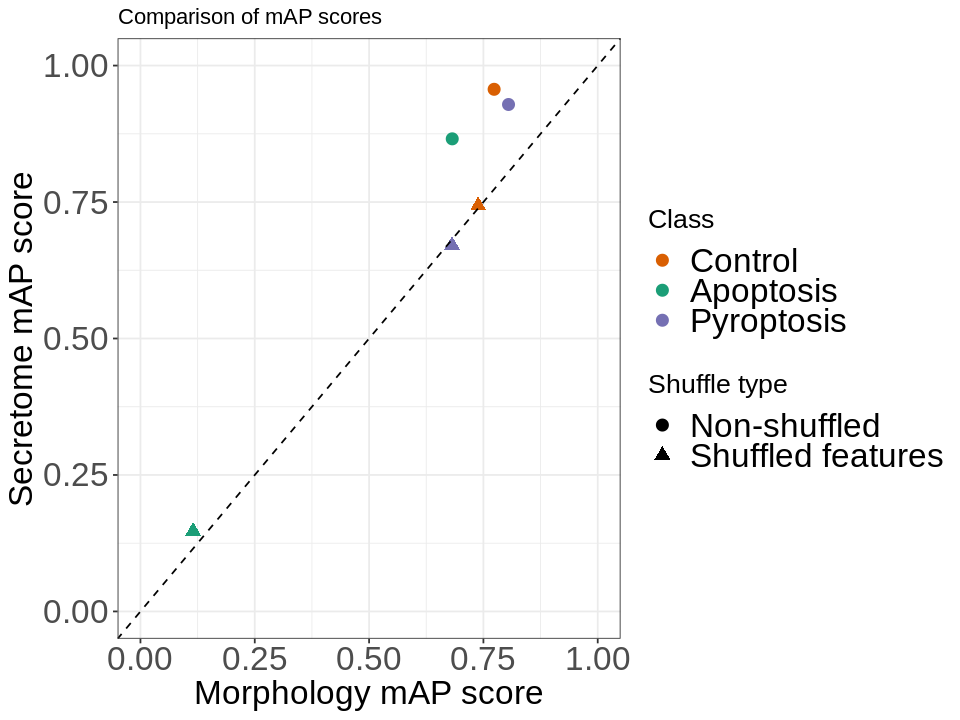

In [17]:
width <- 8
height <- 6
options(repr.plot.width=width, repr.plot.height=height)
# plot the data
scatter_compare <- (
    ggplot(merged_agg, aes(x=morphology_ap, y=secretome_ap, col = Metadata_labels, shape=shuffled))
    + geom_point(size=3, alpha=1)
    + labs(x="Morphology mAP score", y="Secretome mAP score")
    + theme_bw()
    + ggtitle("Comparison of mAP scores")
    + ylim(0,1)
    + xlim(0,1)
    # Change the legend title
    # change the legend shape
    + scale_shape_manual(
        name="Shuffle type",
        labels=c(
            "Non-shuffled", 
            "Shuffled features", 
            "Shuffled phenotypes"
        ),
        values=c(19, 17, 15)
    )
    + scale_color_manual(
        name="Class",
        labels=c(
            "Control", 
            "Apoptosis", 
            "Pyroptosis"
        ),
        values=c(
            brewer.pal(3, "Dark2")[2],
            brewer.pal(3, "Dark2")[1],
            brewer.pal(3, "Dark2")[3]
    )
)
    + figure_theme
    # add y = x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed")

)
scatter_compare

## mAP Scatter compare plot treatemnts


In [18]:
# cobine the dfs
# get the average precision, shuffled, and Metadata_labels columns by name
subset_morphology_treatment <- all_df_morphology_treatment[,c("average_precision", "shuffled", "Metadata_labels","oneb_Metadata_Treatment_Dose_Inhibitor_Dose")]
# rename the average_precision column to moprhology_ap
colnames(subset_morphology_treatment)[colnames(subset_morphology_treatment)=="average_precision"] <- "morphology_ap"

# get the average precision, shuffled, and Metadata_labels columns by name
subset_secretome_treatment <- all_df_secretome_treatment[,c("average_precision", "shuffled", "Metadata_labels","oneb_Metadata_Treatment_Dose_Inhibitor_Dose")]
# rename the average_precision column to secretome_ap
colnames(subset_secretome_treatment)[colnames(subset_secretome_treatment)=="average_precision"] <- "secretome_ap"

# merge the dataframes
merged_df <- merge(subset_morphology_treatment, subset_secretome_treatment, by=c("shuffled", "Metadata_labels", "oneb_Metadata_Treatment_Dose_Inhibitor_Dose"))
head(merged_df)

,shuffled,Metadata_labels,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,morphology_ap,secretome_ap
,<fct>,<chr>,<fct>,<dbl>,<dbl>
1,Non-shuffled,Apoptosis,Thapsigargin_1.000_uM_DMSO_0.025_%,0.7916667,1
2,Non-shuffled,Apoptosis,Thapsigargin_1.000_uM_DMSO_0.025_%,0.7916667,1
3,Non-shuffled,Apoptosis,Thapsigargin_1.000_uM_DMSO_0.025_%,0.7916667,1
4,Non-shuffled,Apoptosis,Thapsigargin_1.000_uM_DMSO_0.025_%,0.7916667,1
5,Non-shuffled,Apoptosis,Thapsigargin_1.000_uM_DMSO_0.025_%,0.7916667,1
6,Non-shuffled,Apoptosis,Thapsigargin_1.000_uM_DMSO_0.025_%,0.7916667,1


In [19]:
# get the number of points that are morphology = 1 and secretome = 1
counts <- table(merged_df$morphology_ap == 1 & merged_df$secretome_ap == 1)
counts


 FALSE   TRUE 
226662   1818 

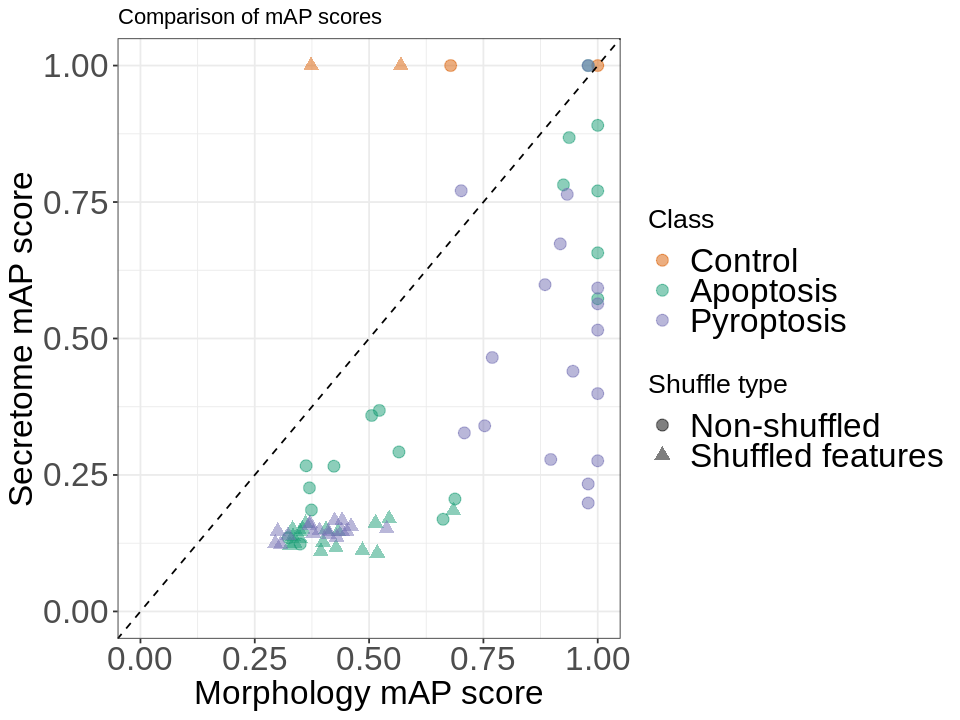

In [20]:
# aggregate the data by shuffled and oneb_Metadata_Treatment_Dose_Inhibitor_Dose and shuffled
merged_agg <- aggregate(. ~ shuffled + oneb_Metadata_Treatment_Dose_Inhibitor_Dose + Metadata_labels, data=merged_df, FUN=mean)
# scatter plot
scatter_compare_treatment <- (
    ggplot(merged_agg, aes(x=morphology_ap, y=secretome_ap, col = Metadata_labels, shape=shuffled))
    + geom_point(size=3, alpha=0.5)
    + labs(x="Morphology mAP score", y="Secretome mAP score")
    + theme_bw()
    + ggtitle("Comparison of mAP scores")
    + ylim(0,1)
    + xlim(0,1)
    # Change the legend title
    # change the legend shape
    + scale_shape_manual(
        name="Shuffle type",
        labels=c(
            "Non-shuffled", 
            "Shuffled features", 
            "Shuffled phenotypes"
        ),
        values=c(19, 17, 15)
    )
    + scale_color_manual(
        name="Class",
        labels=c(
            "Control", 
            "Apoptosis", 
            "Pyroptosis"
        ),
        values=c(
            brewer.pal(3, "Dark2")[2],
            brewer.pal(3, "Dark2")[1],
            brewer.pal(3, "Dark2")[3]
    )
)
    + figure_theme
    # add y = x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color = "black")
)
scatter_compare_treatment

In [21]:
head(merged_agg)

,shuffled,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_labels,morphology_ap,secretome_ap
,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,Non-shuffled,Thapsigargin_1.000_uM_DMSO_0.025_%,Apoptosis,0.6783730,1.0000000
2,Shuffled,Thapsigargin_1.000_uM_DMSO_0.025_%,Apoptosis,0.5694444,1.0000000
3,Non-shuffled,Thapsigargin_10.000_uM_DMSO_0.025_%,Apoptosis,1.0000000,1.0000000
4,Shuffled,Thapsigargin_10.000_uM_DMSO_0.025_%,Apoptosis,0.3731902,1.0000000
5,Non-shuffled,Media,Control,0.5652441,0.2921671
6,Shuffled,Media,Control,0.5141841,0.1621939


In [22]:
merged_df <- merged_df %>%
    mutate(oneb_Metadata_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_0.025_%' ~ "DMSO 0.1% - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_1.000_%' ~ "DMSO 0.1% - DMSO 1.0%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_100.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_30.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 30.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM' ~ "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.0%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_0.100_uM_DMSO_0.025_%' ~ "Disulfiram 0.1 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_1.000_uM_DMSO_0.025_%' ~ "Disulfiram 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_10.000_nM_DMSO_0.025_%' ~ "Topotecan 10.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_0.100_uM' ~ "LPS 10.0 ug/ml - Disulfiram 0.1 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_1.000_uM' ~ "LPS 10.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_2.500_uM' ~ "LPS 10.0 ug/ml - Disulfiram 2.5 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM' ~ "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Disulfiram_1.000_uM' ~ "H2O2 100.0 uM - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Z-VAD-FMK_100.000_uM' ~ "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_2.500_uM_DMSO_0.025_%' ~ "Disulfiram 2.5 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_20.000_nM_DMSO_0.025_%' ~ "Topotecan 20.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_5.000_nM_DMSO_0.025_%' ~ "Topotecan 5.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_ctr_0.0_0' ~ "Media ctr 0.0 0",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_0.0_0' ~ "Media ctr 0.0 0"
    ))
    # replace Media ctr 0.0 0 with Media
merged_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- gsub("Media ctr 0.0 0", "Media", merged_df$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)

# split the oneb_Metadata_Treatment_Dose_Inhibitor_Dose into two columns by the " - " delimiter
merged_df <- merged_df %>%
    separate(oneb_Metadata_Treatment_Dose_Inhibitor_Dose, c("inducer", "inhibitor"), sep = " - ", remove = FALSE)

unique(merged_df$inducer)
# replace the inhibitor NA with Media
merged_df$inhibitor <- ifelse(is.na(merged_df$inhibitor), "Media", merged_df$inhibitor)
unique(merged_df$inhibitor)

# make the group_treatment column a factor
merged_df$inducer <- factor(
    merged_df$inducer,
    levels = c(
        'Media',
        'DMSO 0.1%',

        'Flagellin 0.1 ug/ml',
        'Flagellin 1.0 ug/ml',

        'LPS 0.01 ug/ml',
        'LPS 0.1 ug/ml',
        'LPS 1.0 ug/ml',
        'LPS 10.0 ug/ml',
        'LPS 100.0 ug/ml',

        'LPS 1.0 ug/ml + Nigericin 1.0 uM',
        'LPS 1.0 ug/ml + Nigericin 3.0 uM',
        'LPS 1.0 ug/ml + Nigericin 10.0 uM',

        'LPS 100.0 ug/ml + Nigericin 1.0 uM',
        'LPS 100.0 ug/ml + Nigericin 3.0 uM',
        'LPS 100.0 ug/ml + Nigericin 10.0 uM',

        'H2O2 100.0 nM',
        'H2O2 100.0 uM',

        'Disulfiram 0.1 uM',
        'Disulfiram 1.0 uM',
        'Disulfiram 2.5 uM',

        'Thapsigargin 1.0 uM',
        'Thapsigargin 10.0 uM',

        'Topotecan 5.0 nM',
        'Topotecan 10.0 nM',
        'Topotecan 20.0 nM'
    )
)

# make the group_treatment column a factor
merged_df$inhibitor <- factor(
    merged_df$inhibitor,
    levels = c(
        'Media',
        'DMSO 0.025%',
        'DMSO 1.0%',

        'Disulfiram 0.1 uM',
        'Disulfiram 1.0 uM',
        'Disulfiram 2.5 uM',

        'Z-VAD-FMK 30.0 uM',
        'Z-VAD-FMK 100.0 uM'
    )
)
head(merged_df)

[1] "Thapsigargin 1.0 uM"                 "Thapsigargin 10.0 uM"               
 [3] "Disulfiram 0.1 uM"                   "Disulfiram 1.0 uM"                  
 [5] "Disulfiram 2.5 uM"                   "DMSO 0.1%"                          
 [7] "Flagellin 0.1 ug/ml"                 "H2O2 100.0 nM"                      
 [9] "H2O2 100.0 uM"                       "LPS 10.0 ug/ml"                     
[11] "LPS 1.0 ug/ml + Nigericin 10.0 uM"   NA                                   
[13] "Topotecan 10.0 nM"                   "Topotecan 20.0 nM"                  
[15] "Topotecan 5.0 nM"                    "Flagellin 1.0 ug/ml"                
[17] "LPS 0.01 ug/ml"                      "LPS 0.1 ug/ml"                      
[19] "LPS 1.0 ug/ml"                       "LPS 100.0 ug/ml"                    
[21] "LPS 1.0 ug/ml + Nigericin 1.0 uM"    "LPS 1.0 ug/ml + Nigericin 3.0 uM"   
[23] "LPS 100.0 ug/ml + Nigericin 1.0 uM"  "LPS 100.0 ug/ml + Nigericin 10.0 uM"
[25] "LPS 100.0 ug/ml + Nigericin 3.0 uM"

[1] "DMSO 0.025%"        "DMSO 1.0%"          "Z-VAD-FMK 100.0 uM"
[4] "Z-VAD-FMK 30.0 uM"  "Disulfiram 1.0 uM"  "Media"             
[7] "Disulfiram 0.1 uM"  "Disulfiram 2.5 uM"

,shuffled,Metadata_labels,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,inducer,inhibitor,morphology_ap,secretome_ap
,<fct>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>
1,Non-shuffled,Apoptosis,Thapsigargin 1.0 uM - DMSO 0.025%,Thapsigargin 1.0 uM,DMSO 0.025%,0.7916667,1
2,Non-shuffled,Apoptosis,Thapsigargin 1.0 uM - DMSO 0.025%,Thapsigargin 1.0 uM,DMSO 0.025%,0.7916667,1
3,Non-shuffled,Apoptosis,Thapsigargin 1.0 uM - DMSO 0.025%,Thapsigargin 1.0 uM,DMSO 0.025%,0.7916667,1
4,Non-shuffled,Apoptosis,Thapsigargin 1.0 uM - DMSO 0.025%,Thapsigargin 1.0 uM,DMSO 0.025%,0.7916667,1
5,Non-shuffled,Apoptosis,Thapsigargin 1.0 uM - DMSO 0.025%,Thapsigargin 1.0 uM,DMSO 0.025%,0.7916667,1
6,Non-shuffled,Apoptosis,Thapsigargin 1.0 uM - DMSO 0.025%,Thapsigargin 1.0 uM,DMSO 0.025%,0.7916667,1


In [23]:
# aggregate the data by shuffled and oneb_Metadata_Treatment_Dose_Inhibitor_Dose and shuffled
merged_df <- aggregate(. ~ shuffled + oneb_Metadata_Treatment_Dose_Inhibitor_Dose + Metadata_labels + inducer + inhibitor, data=merged_df, FUN=mean)
head(merged_df)

,shuffled,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_labels,inducer,inhibitor,morphology_ap,secretome_ap
,<fct>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>
1,Non-shuffled,DMSO 0.1% - DMSO 0.025%,Control,DMSO 0.1%,DMSO 0.025%,0.6877238,0.2060009
2,Shuffled,DMSO 0.1% - DMSO 0.025%,Control,DMSO 0.1%,DMSO 0.025%,0.6842913,0.1848519
3,Non-shuffled,Flagellin 0.1 ug/ml - DMSO 0.025%,Control,Flagellin 0.1 ug/ml,DMSO 0.025%,0.9791667,1.0000000
4,Shuffled,Flagellin 0.1 ug/ml - DMSO 0.025%,Control,Flagellin 0.1 ug/ml,DMSO 0.025%,0.3489929,0.1336578
5,Non-shuffled,Flagellin 1.0 ug/ml - DMSO 0.025%,Pyroptosis,Flagellin 1.0 ug/ml,DMSO 0.025%,0.7013889,0.7706767
6,Shuffled,Flagellin 1.0 ug/ml - DMSO 0.025%,Pyroptosis,Flagellin 1.0 ug/ml,DMSO 0.025%,0.4410384,0.1665349


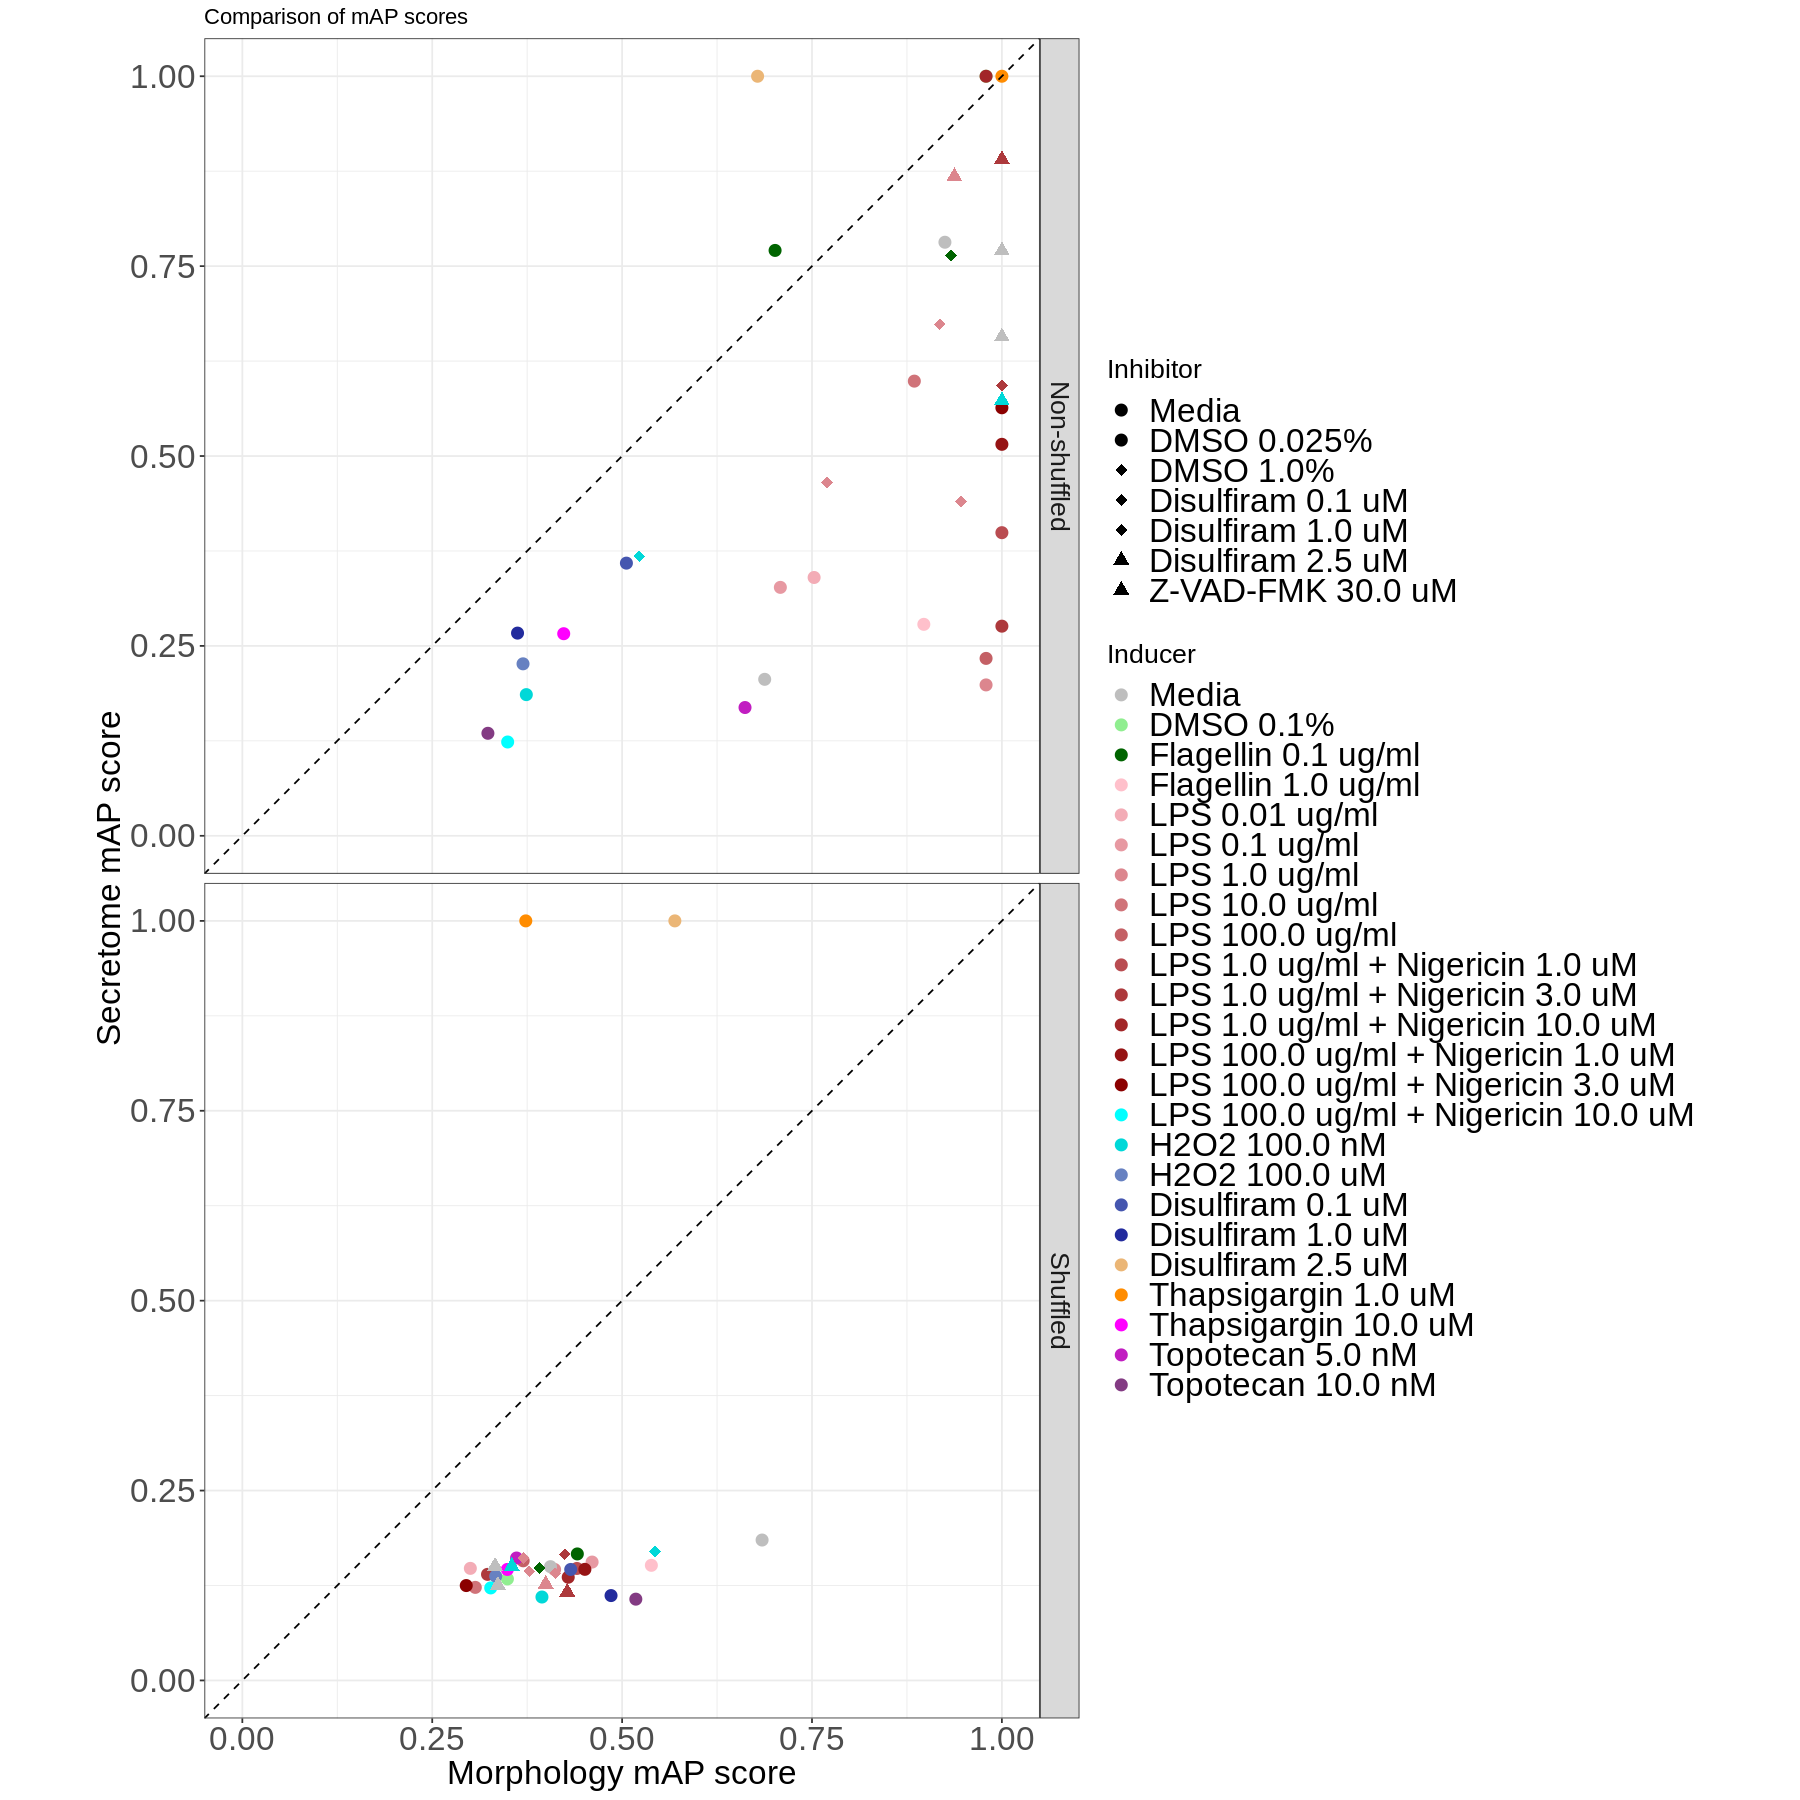

In [24]:
width <- 15
height <- 15
options(repr.plot.width=width, repr.plot.height=height)
# scatter plot with fill being the treatment dose
scatter_by_treatment <- (
    ggplot(merged_df, aes(x=morphology_ap, y=secretome_ap, col = inducer, shape=inhibitor))
    + geom_point(size=3, alpha=1)
    + labs(x="Morphology mAP score", y="Secretome mAP score")
    + theme_bw()
    + ggtitle("Comparison of mAP scores")
    + ylim(0,1)
    + xlim(0,1)
    + figure_theme
    # Change the legend title
    # change the legend shape
    + scale_color_manual(
        name = "Inducer",
        labels = c(
            'Media',
            'DMSO 0.1%',

            'Flagellin 0.1 ug/ml',
            'Flagellin 1.0 ug/ml',

            'LPS 0.01 ug/ml',
            'LPS 0.1 ug/ml',
            'LPS 1.0 ug/ml',
            'LPS 10.0 ug/ml',
            'LPS 100.0 ug/ml',

            'LPS 1.0 ug/ml + Nigericin 1.0 uM',
            'LPS 1.0 ug/ml + Nigericin 3.0 uM',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM',

            'LPS 100.0 ug/ml + Nigericin 1.0 uM',
            'LPS 100.0 ug/ml + Nigericin 3.0 uM',
            'LPS 100.0 ug/ml + Nigericin 10.0 uM',

            'H2O2 100.0 nM',
            'H2O2 100.0 uM',

            'Disulfiram 0.1 uM',
            'Disulfiram 1.0 uM',
            'Disulfiram 2.5 uM',

            'Thapsigargin 1.0 uM',
            'Thapsigargin 10.0 uM',

            'Topotecan 5.0 nM',
            'Topotecan 10.0 nM',
            'Topotecan 20.0 nM'
        ),
        values = colors)
    + scale_shape_manual(
        name = "Inhibitor",
        labels = c(
            'Media',
            'DMSO 0.025%',
            'DMSO 1.0%',

            'Disulfiram 0.1 uM',
            'Disulfiram 1.0 uM',
            'Disulfiram 2.5 uM',

            'Z-VAD-FMK 30.0 uM',
            'Z-VAD-FMK 100.0 uM'

        ),
        values = shapes
    )
    # make the legend 1 column
    + guides(color = guide_legend(ncol = 1), shape = guide_legend(ncol = 1))
    + ggplot2::coord_fixed()
    + facet_grid(shuffled~.)
    # add y = x line
    + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black")
)
scatter_by_treatment